In [1]:
import pandas as pd
import os
import torch
import matplotlib.pyplot as plt

In [2]:
from basicRNN import *
print(device)

cuda


self.spacing 4
data.shape torch.Size([9181, 120, 200])
labels.shape torch.Size([9181, 3])
labels scales tensor([2.0173, 3.5971, 1.6332])


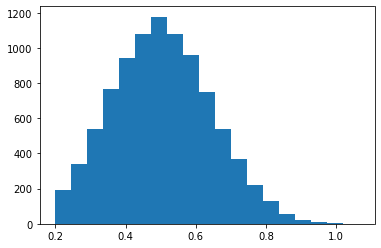

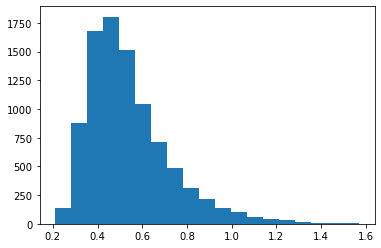

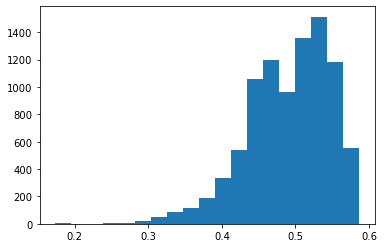

labels scales tensor([0.5048, 0.5396, 0.4905])
train_dataset 7345
test_dataset 1836


In [3]:
ts = trainingService('paramsConfigGRU3.yml')
ts.loadData()

In [4]:
ts.setupModel()

In [5]:
ts.loadModel()

In [7]:
ts.trainModel(learning_rate=1e-3, weight_decay=0, num_epochs=50)
ts.trainModel(learning_rate=1e-4, weight_decay=0, num_epochs=50)

#ts.trainModel(learning_rate=1e-4, weight_decay=0.5e-4, num_epochs=50)
#ts.trainModel(learning_rate=1e-5, weight_decay=0.5e-5, num_epochs=50)
#ts.trainModel(learning_rate=0.5e-5, weight_decay=0.5e-5, num_epochs=50)

Epoch [5/50]], Loss: 0.000324, , Loss Val: 0.001001
Epoch [10/50]], Loss: 0.000531, , Loss Val: 0.000816
Epoch [15/50]], Loss: 0.000299, , Loss Val: 0.000927
Epoch [20/50]], Loss: 0.000309, , Loss Val: 0.000673
Epoch [25/50]], Loss: 0.000252, , Loss Val: 0.001127
Epoch [30/50]], Loss: 0.000538, , Loss Val: 0.001406
Epoch [35/50]], Loss: 0.000199, , Loss Val: 0.000941
Epoch [40/50]], Loss: 0.000179, , Loss Val: 0.000890
Epoch [45/50]], Loss: 0.000177, , Loss Val: 0.000886
Epoch [50/50]], Loss: 0.000162, , Loss Val: 0.000829
Epoch [5/50]], Loss: 0.000103, , Loss Val: 0.001057
Epoch [10/50]], Loss: 0.000112, , Loss Val: 0.000813
Epoch [15/50]], Loss: 0.000108, , Loss Val: 0.000823
Epoch [20/50]], Loss: 0.000107, , Loss Val: 0.000917
Epoch [25/50]], Loss: 0.000099, , Loss Val: 0.000813
Epoch [30/50]], Loss: 0.000088, , Loss Val: 0.000905
Epoch [35/50]], Loss: 0.000088, , Loss Val: 0.001078
Epoch [40/50]], Loss: 0.000095, , Loss Val: 0.000839
Epoch [45/50]], Loss: 0.000080, , Loss Val: 0.00

In [8]:
ts.saveModel()

Results for:  Seeing
Mean/Median Absolute error TEST: 0.020683285 0.016771913
Mean/Median Absolute error TRAIN: 0.007155010827996752 0.005908176302909851
R^2 0.9612614651790212
Mean/Median Relative error TEST: 0.041052169807931534 0.035150406578498064
Mean/Median Relative error TRAIN: 0.015605971677031757 0.011863572020684457


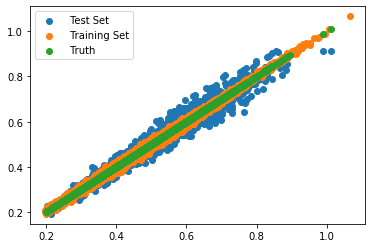

Results for:  Tau0
Mean/Median Absolute error TEST: 0.031458173 0.023292929
Mean/Median Absolute error TRAIN: 0.007076943378993555 0.005968332290649414
R^2 0.9488601396671591
Mean/Median Relative error TEST: 0.057421543223845836 0.04707121767931463
Mean/Median Relative error TRAIN: 0.014757815409987359 0.01137331211290643


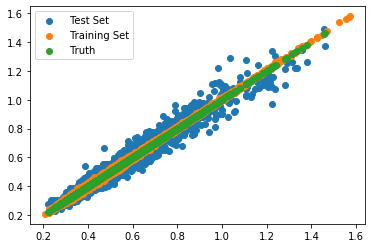

Results for:  Strehl
Mean/Median Absolute error TEST: 0.009190847 0.0062385052
Mean/Median Absolute error TRAIN: 0.004269974524759802 0.0033157020807266235
R^2 0.9471642882719506
Mean/Median Relative error TEST: 0.020387774000987274 0.012482396923065402
Mean/Median Relative error TRAIN: 0.009133246880501511 0.006699698030722017


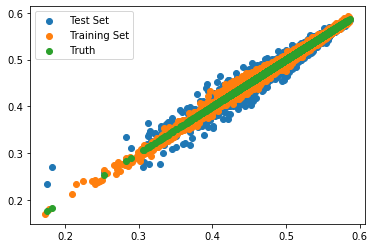

In [9]:
plotResults(ts, [0,1,2])